In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
img = cv2.imread('./Dataset\DS\dasun-1658591452.jpg')
img.shape

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Isara Liyanage\AppData\Local\Temp\ipykernel_19344\301377158.py:1: SyntaxWarning: invalid escape sequence '\D'
  img = cv2.imread('./Dataset\DS\dasun-1658591452.jpg')


(400, 400, 3)

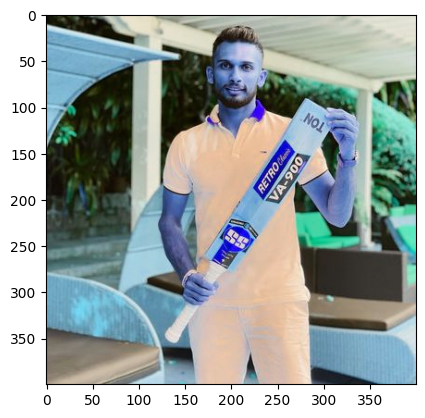

In [16]:
plt.imshow(img)

In [17]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(400, 400)

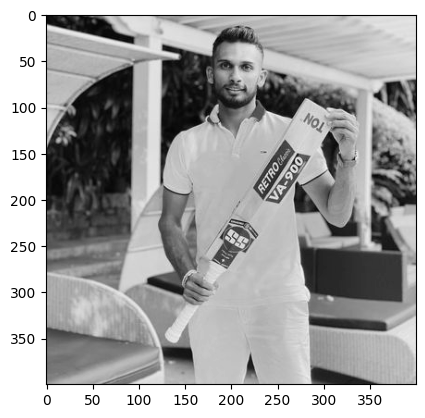

In [18]:
plt.imshow(gray, cmap='gray')

In [19]:
face_cascade = cv2.CascadeClassifier('./Open CV\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./Open CV\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Isara Liyanage\AppData\Local\Temp\ipykernel_19344\1527002442.py:1: SyntaxWarning: invalid escape sequence '\h'
  face_cascade = cv2.CascadeClassifier('./Open CV\haarcascade_frontalface_default.xml')
C:\Users\Isara Liyanage\AppData\Local\Temp\ipykernel_19344\1527002442.py:2: SyntaxWarning: invalid escape sequence '\h'
  eye_cascade = cv2.CascadeClassifier('./Open CV\haarcascade_eye.xml')


array([[176,  34,  59,  59]])

In [20]:
(x,y,w,h) = faces[0]
x,y,w,h

(176, 34, 59, 59)

4 values refer to x,y,height,width

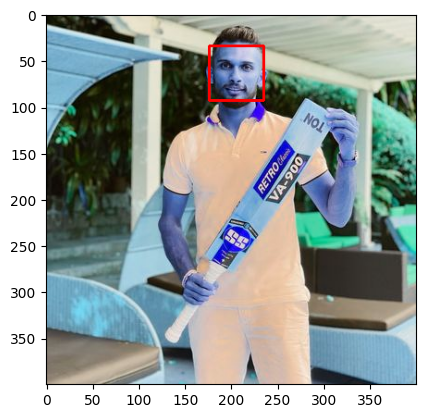

In [21]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

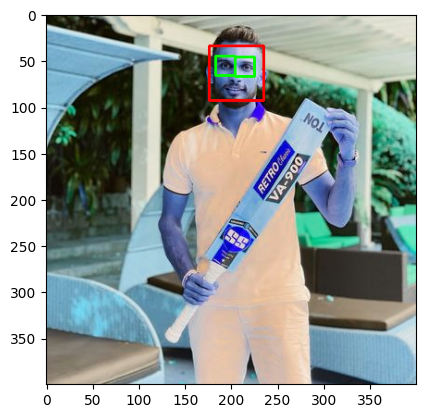

In [22]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    interested_region_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(interested_region_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

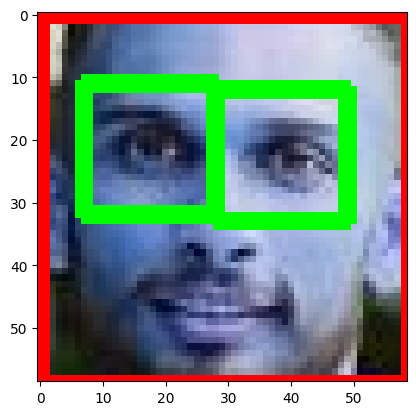

In [23]:
%matplotlib inline
plt.imshow(interested_region_color, cmap='gray')

In [47]:
# Cropping the face
def cropped_image_if_two_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        interested_region_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return interested_region_color

In [48]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [49]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [50]:
img_dirs

['./Dataset/DS', './Dataset/MT', './Dataset/PN', './Dataset/WH']

In [51]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [52]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        #print(entry.path)
        roi_color = cropped_image_if_two_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

DS
Generating cropped images in folder:  ./Dataset/cropped/DS
MT
Generating cropped images in folder:  ./Dataset/cropped/MT
PN
Generating cropped images in folder:  ./Dataset/cropped/PN
WH
Generating cropped images in folder:  ./Dataset/cropped/WH


In [53]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'DS': ['./Dataset/cropped/DS\\DS1.png',
  './Dataset/cropped/DS\\DS10.png',
  './Dataset/cropped/DS\\DS11.png',
  './Dataset/cropped/DS\\DS12.png',
  './Dataset/cropped/DS\\DS13.png',
  './Dataset/cropped/DS\\DS14.png',
  './Dataset/cropped/DS\\DS15.png',
  './Dataset/cropped/DS\\DS16.png',
  './Dataset/cropped/DS\\DS17.png',
  './Dataset/cropped/DS\\DS18.png',
  './Dataset/cropped/DS\\DS2.png',
  './Dataset/cropped/DS\\DS3.png',
  './Dataset/cropped/DS\\DS4.png',
  './Dataset/cropped/DS\\DS5.png',
  './Dataset/cropped/DS\\DS6.png',
  './Dataset/cropped/DS\\DS7.png',
  './Dataset/cropped/DS\\DS8.png',
  './Dataset/cropped/DS\\DS9.png'],
 'MT': ['./Dataset/cropped/MT\\MT1.png',
  './Dataset/cropped/MT\\MT10.png',
  './Dataset/cropped/MT\\MT11.png',
  './Dataset/cropped/MT\\MT12.png',
  './Dataset/cropped/MT\\MT13.png',
  './Dataset/cropped/MT\\MT14.png',
  './Dataset/cropped/MT\\MT15.png',
  './Dataset/cropped/MT\\MT16.png',
  './Dataset/cropped/MT\\MT17.png',
  './Dataset/cropped/MT\\

In [54]:

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'DS': 0, 'MT': 1, 'PN': 2, 'WH': 3}

In [55]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [58]:
cropped_img = np.array(interested_region_color)
cropped_img.shape

(59, 59, 3)

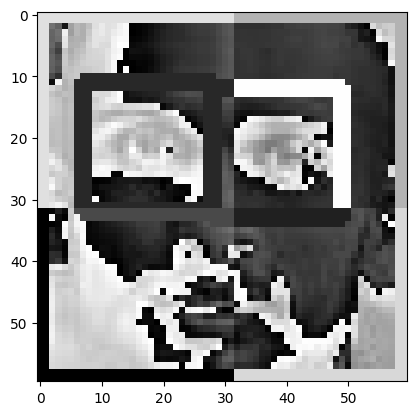

In [59]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [60]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        # We stack both raw and har(wavelenght transformed) features in a single column
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [61]:
len(X)

69

In [62]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(69, 4096)